In [1]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import lbg_forecast.sps as sps
import lbg_forecast.sfh as sfh
import lbg_forecast.priors as pr
import lbg_forecast.hyperparameters as hyp
import lbg_forecast.population_model as pop
import lbg_forecast.zhistory as zh
import lbg_forecast.priors as pr
import lbg_forecast.noise as noise
import lbg_forecast.selection as sel

import getdist
from getdist import plots, MCSamples

In [3]:
#sps_model = sps.initialise_sps_model(neb_em=False)

In [4]:
hyperparameter_mu_bounds, hyperparameter_sigma_max = hyp.default_hyperparameter_bounds()

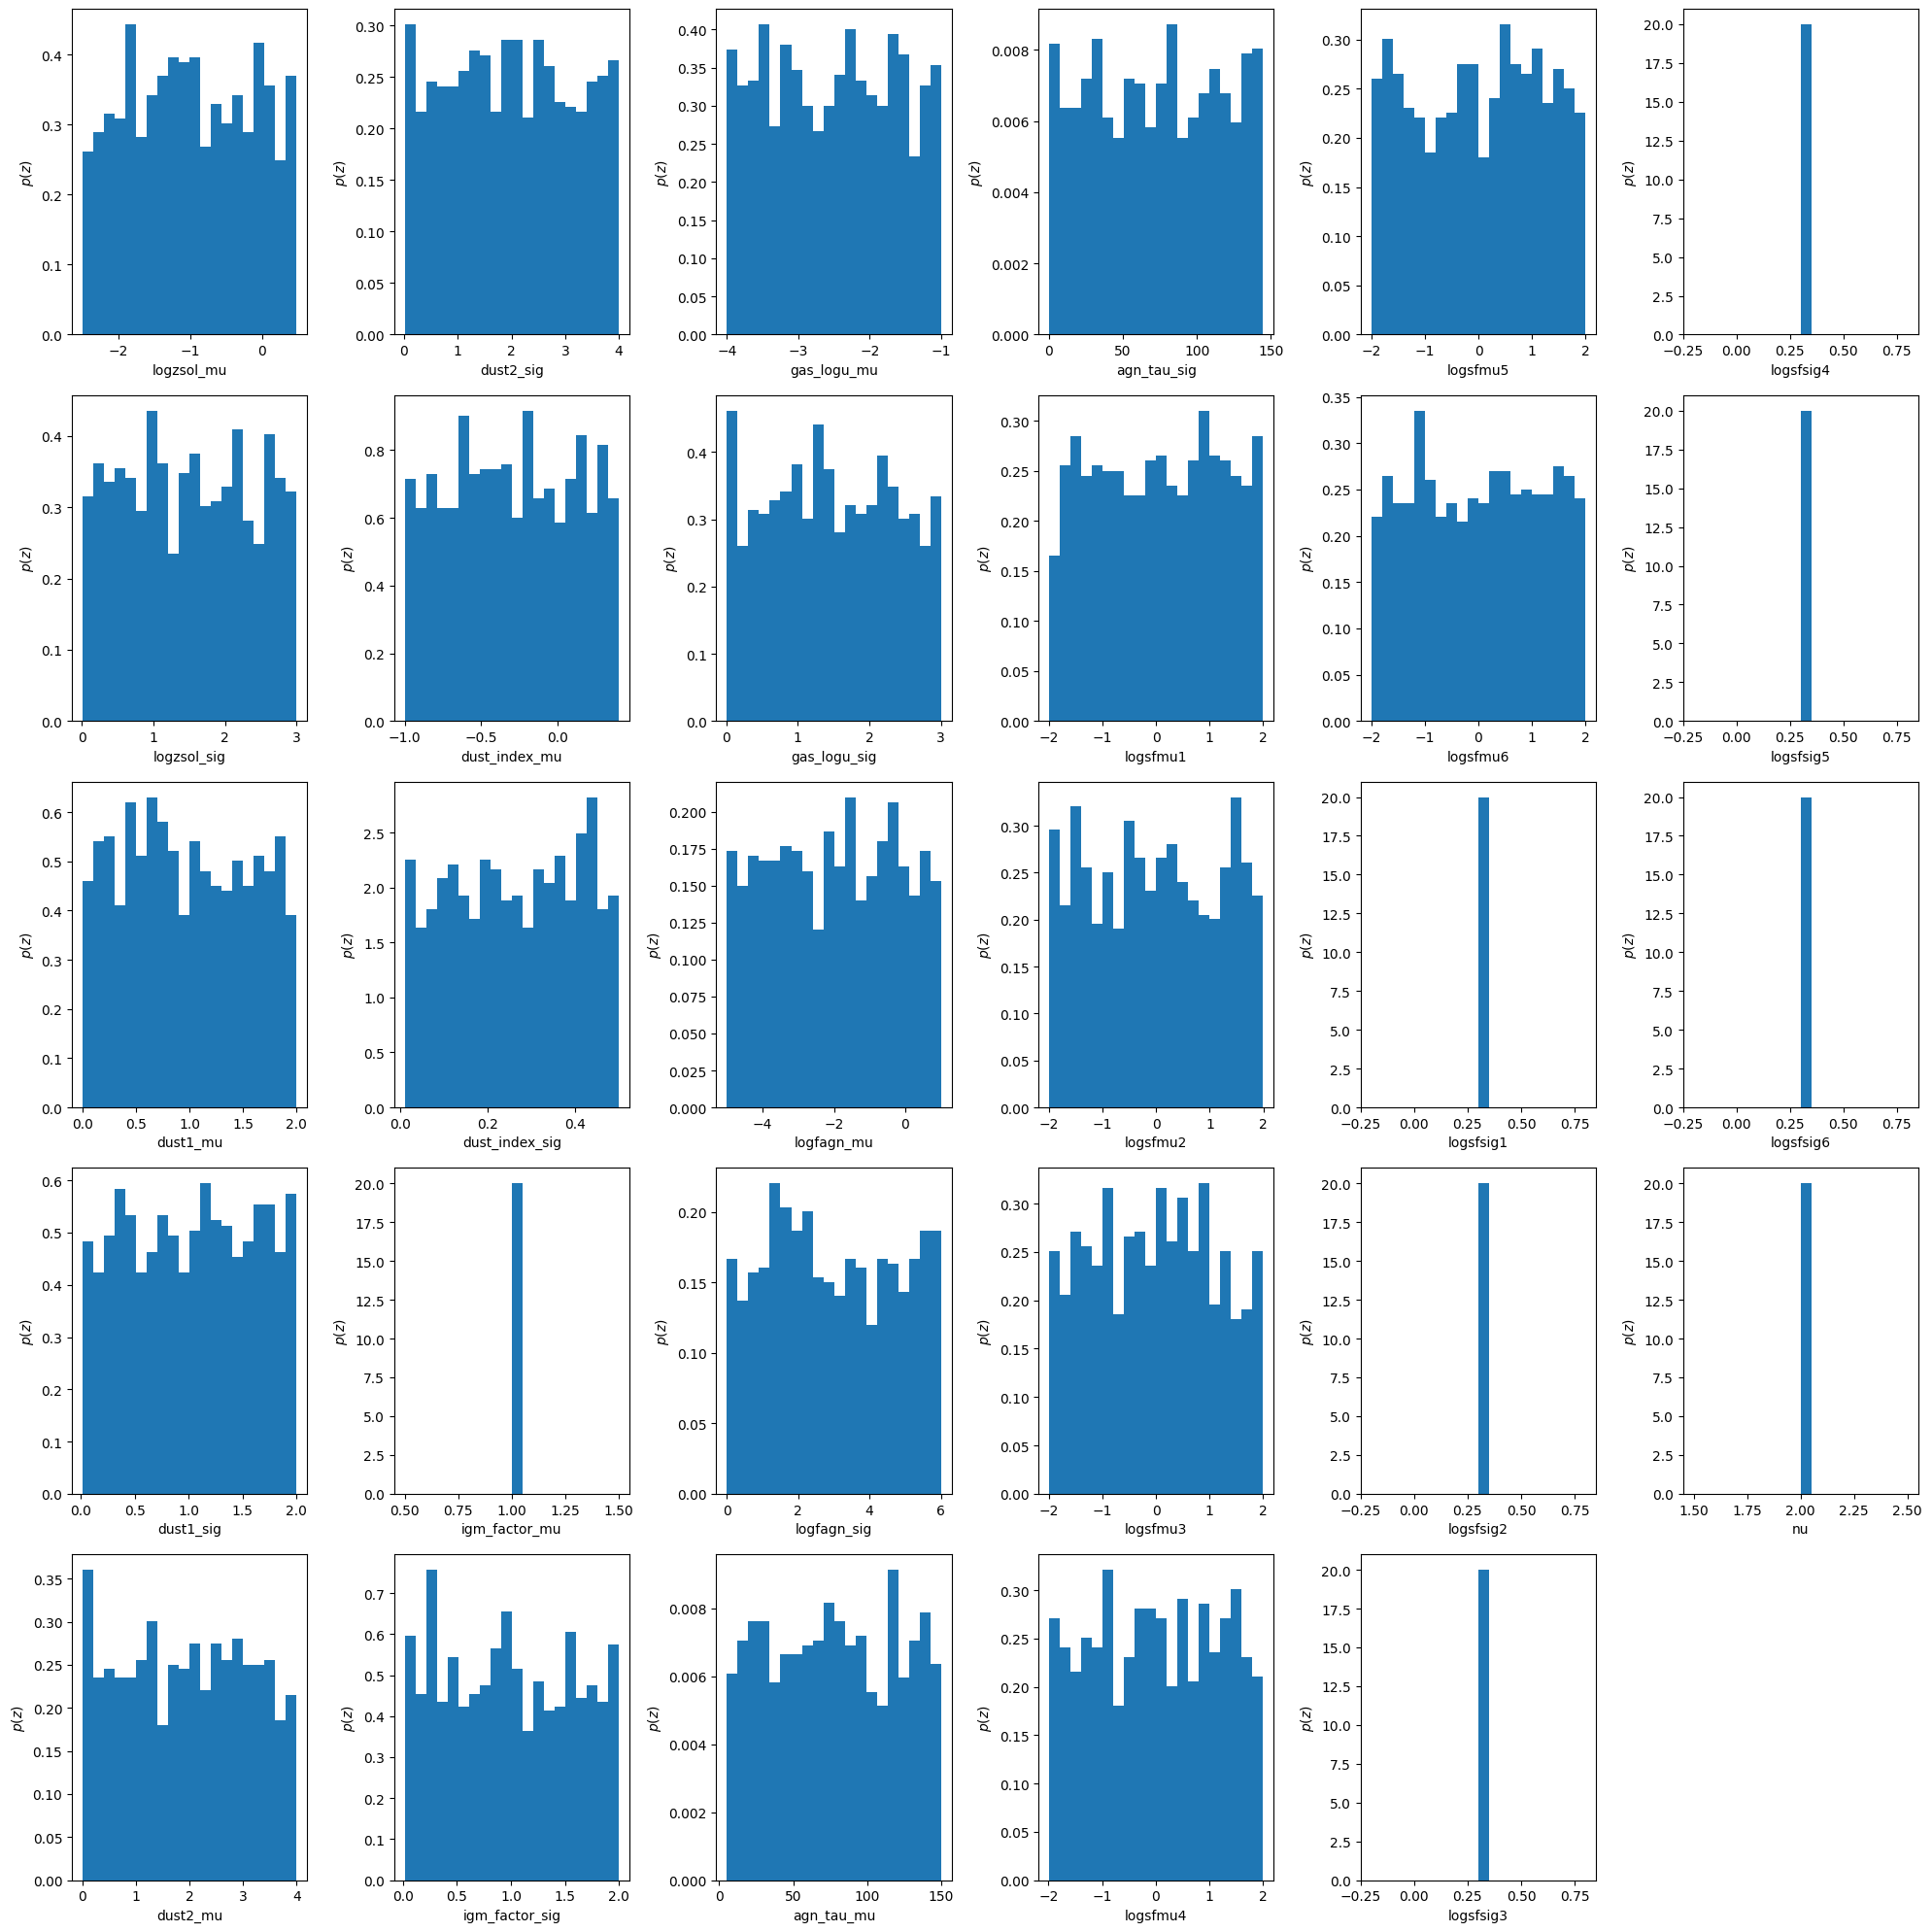

In [5]:
prior_parameters = hyp.sample_prior_parameters(1000, hyperparameter_mu_bounds, hyperparameter_sigma_max)
hyp.plot_hyperparameters(prior_parameters)

In [6]:
redshift_mass_prior_parameters = pr.setup_redshift_and_mass_priors(z_max=12)

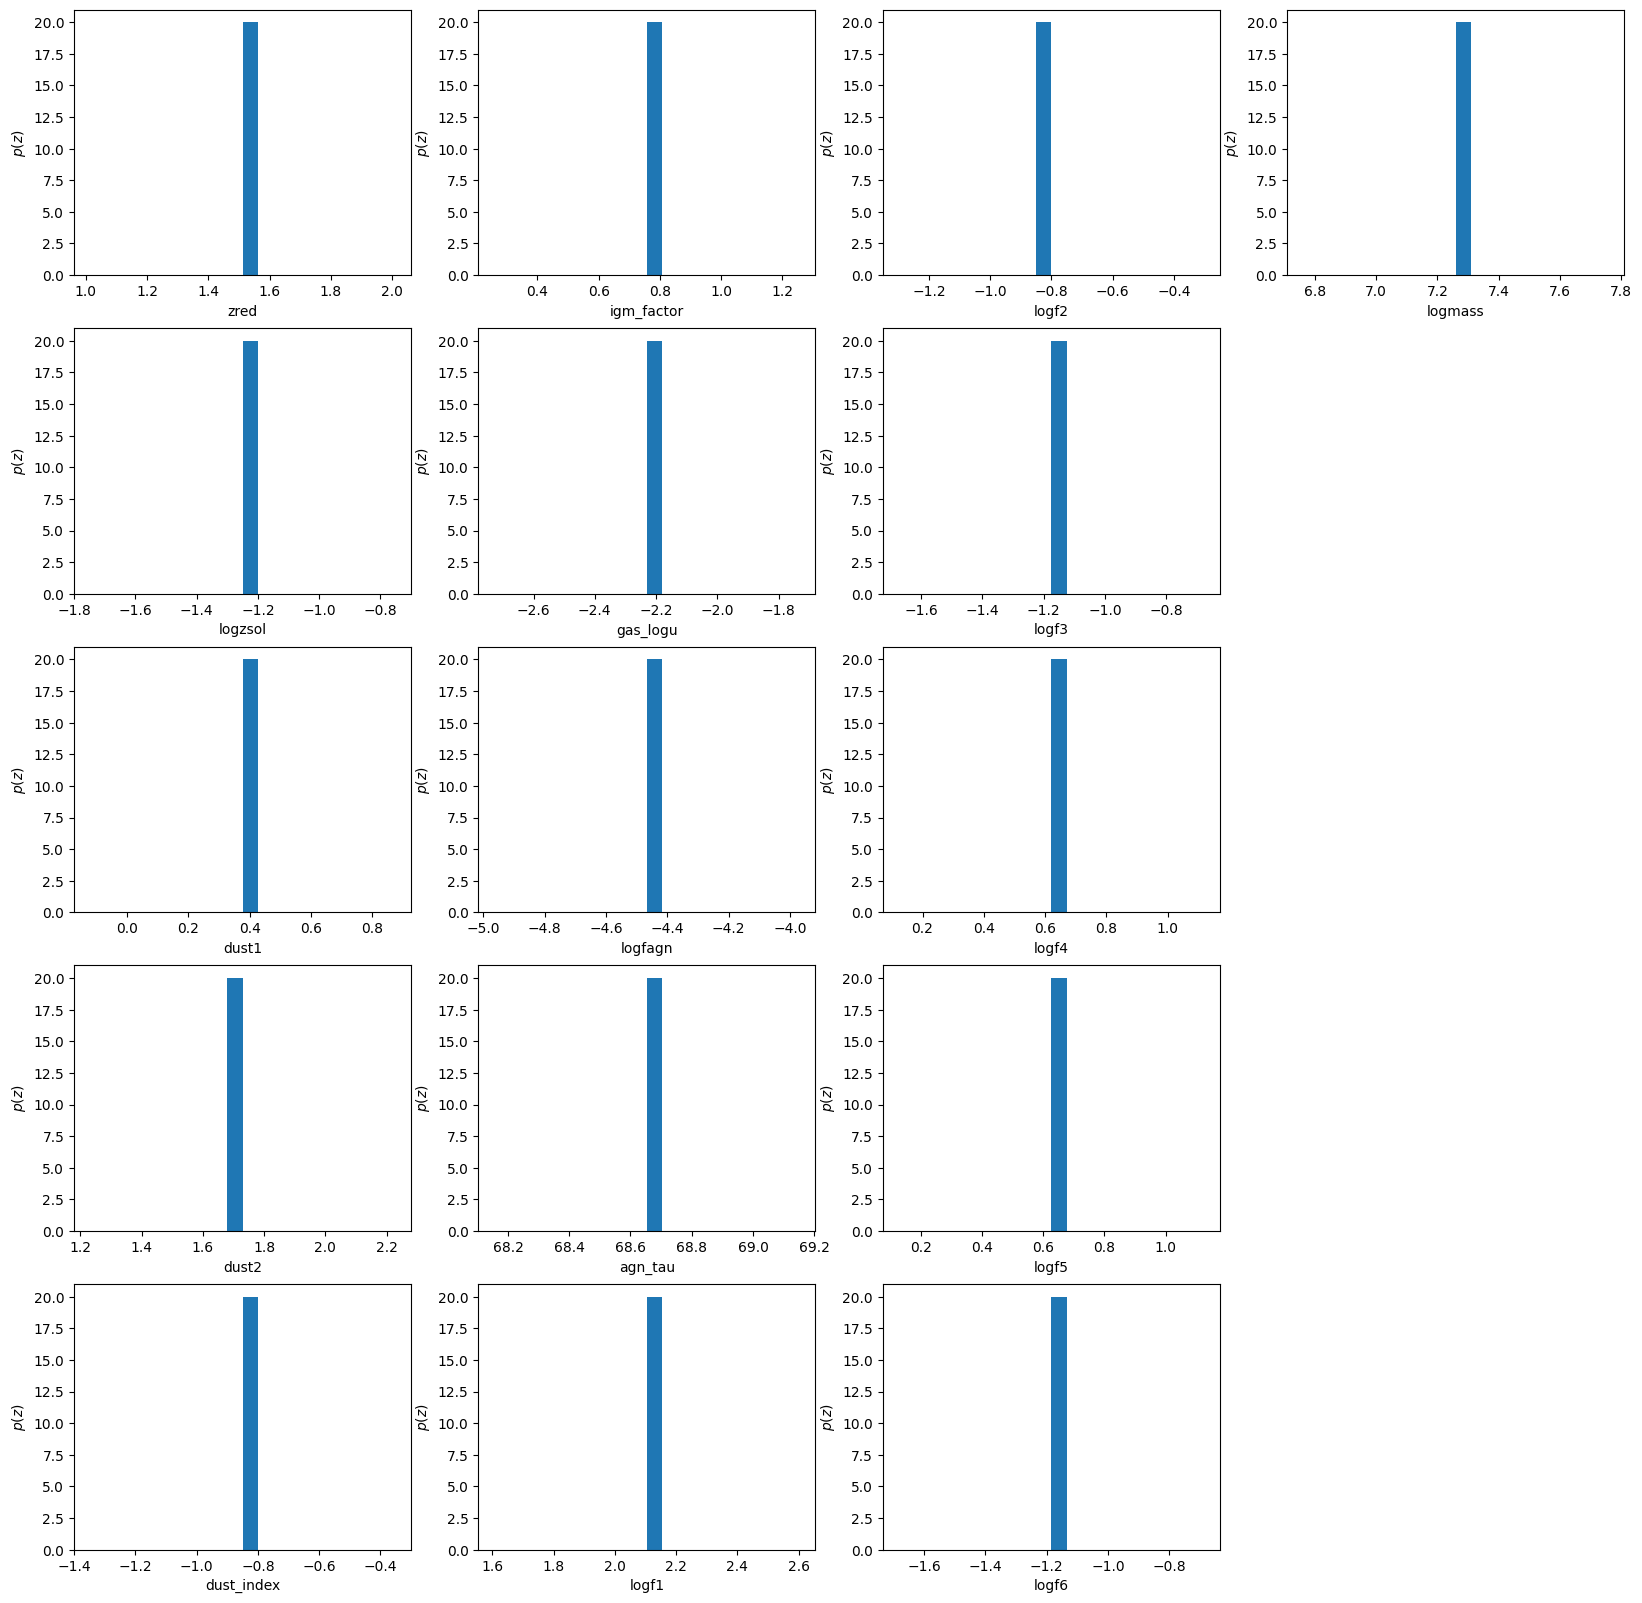

In [39]:
sps_parameters = pop.generate_sps_parameters(1, prior_parameters[np.random.randint(0, 1000),:], redshift_mass_prior_parameters)
pop.plot_galaxy_population(sps_parameters, rows=5, nbins=20)

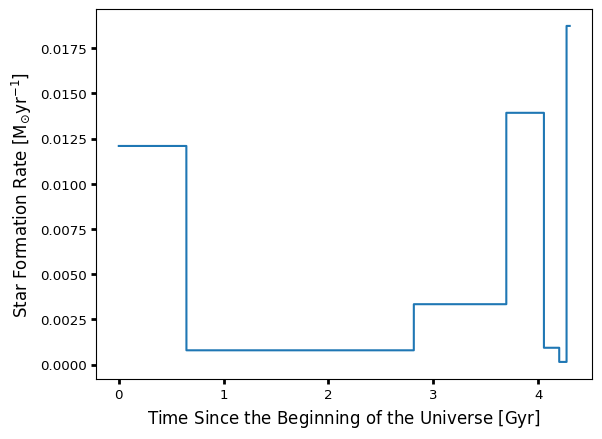

In [40]:
sfh.sps_parameters_to_sfh(sps_parameters[0,:], sfh.default_agebins())

0.0007978370627635222 0.0007976214843715941 18166279.30518338 18166279.30518338


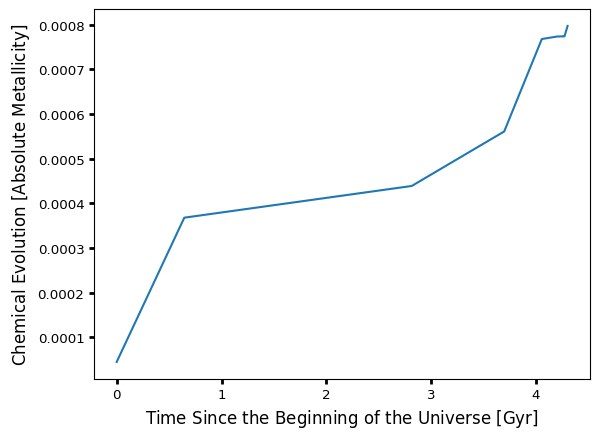

In [41]:
zh.sps_parameters_to_zhistory(sps_parameters[0,:], sfh.default_agebins())

In [43]:
photometry = sps.simulate_photometry(sps_parameters, "lsst", imf=2, dust=0, nebem=False, zhistory=False)

Starting Run 1/3
libraries:  (b'mist', b'miles', b'DL07')
Run 1/3 Complete
Complete


In [46]:
lbg_photometry = noise.get_noisy_magnitudes(sps_parameters, photometry, random_state=np.random.randint(0, 100000))
lbg_photometry = sel.colours(lbg_photometry)

Removed no burn in


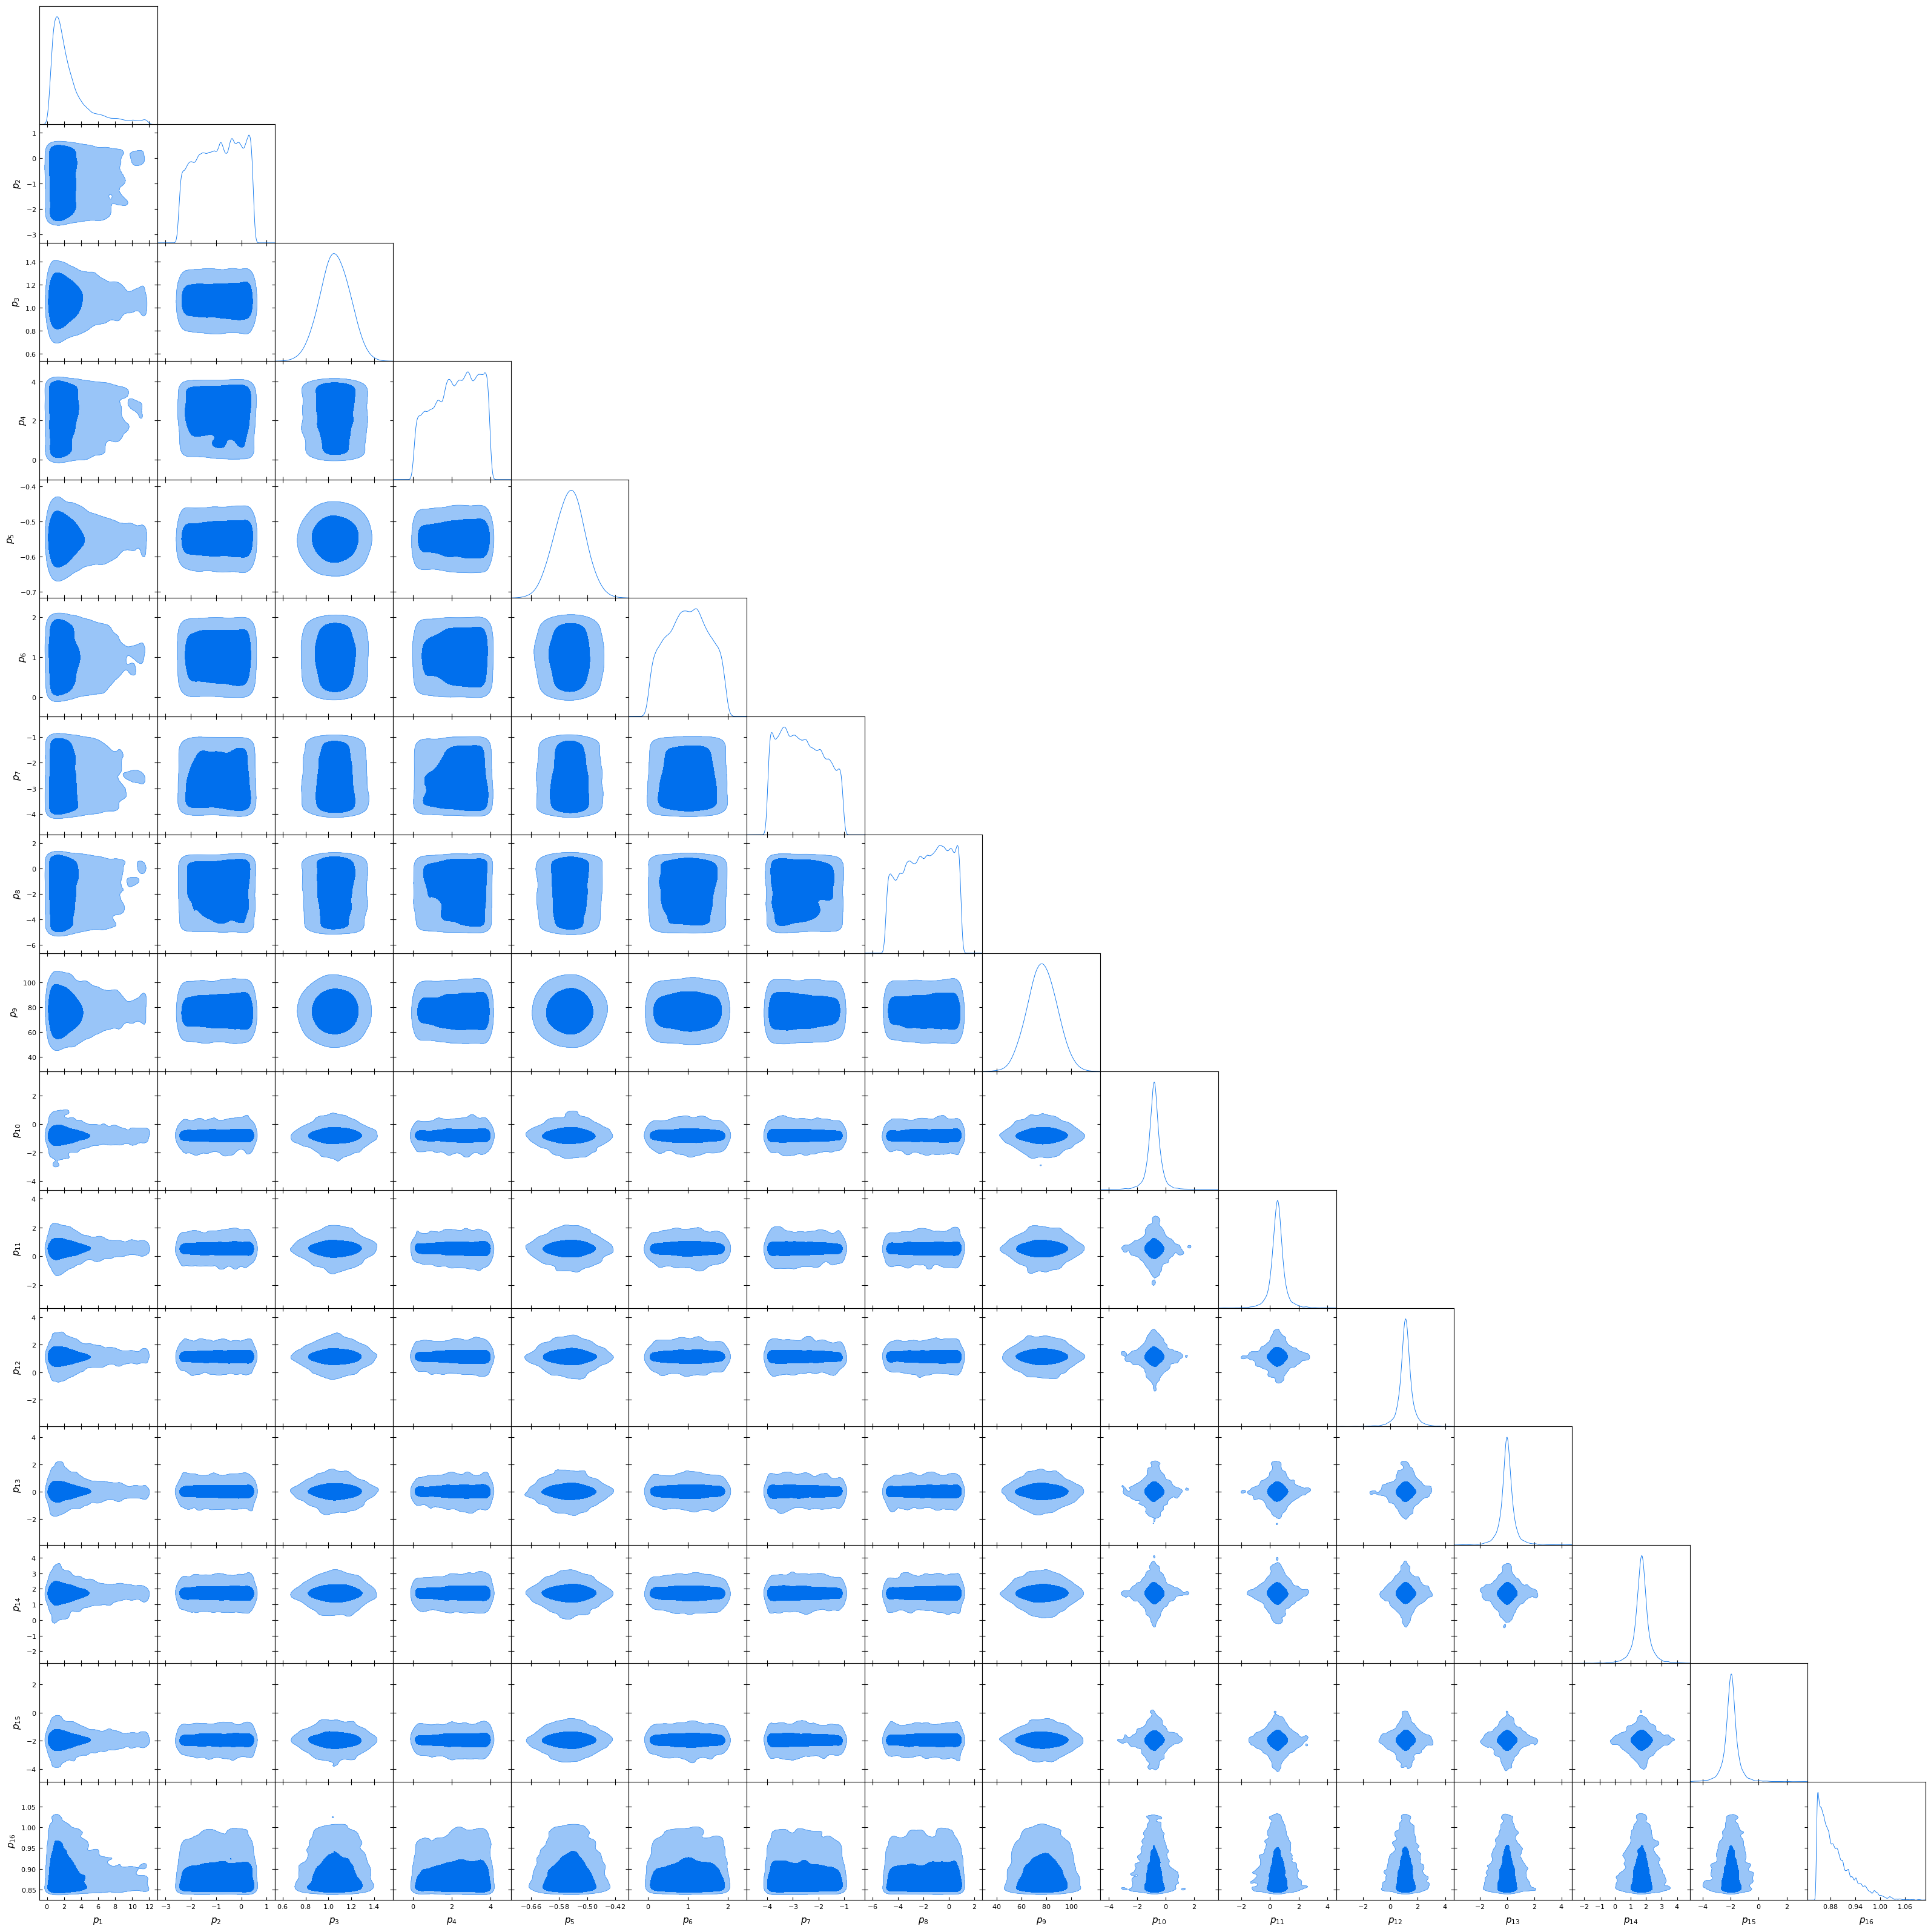

In [38]:
g = plots.get_subplot_plotter()
samples = sps_parameters
samples[:,-1] = np.log10(samples[:, -1])
samples[:,7] = np.log10(samples[:, 7])
g.triangle_plot([MCSamples(samples=sps_parameters)], filled=True)